# Data Preprocessing of Titanic Dataset

## Import Data and Moduls






In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("titanic.csv")
df_original = df

## Know Your Data

In [3]:
df_original.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_original.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [5]:
#Normalize the Fare Column

df_original['Fare'] = (df_original['Fare'] - df_original['Fare'].mean())/df_original['Fare'].std()
def normalize(dataset):
    dataNorm=((dataset-dataset.min())/(dataset.max()-dataset.min()))*20
    return dataNorm

df_original['Fare'] = normalize(df_original['Fare'])
df_original

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0.283021,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,2.782715,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,0.309371,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,2.072886,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,0.314251,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,0.507486,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,1.171122,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,0.915427,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,1.171122,C148,C


In [6]:
df_original.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## See Your Data (Visualization)

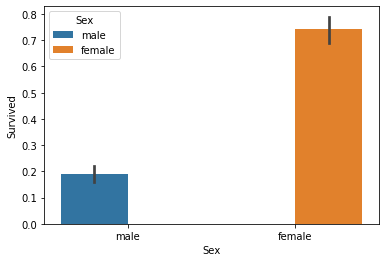

In [8]:
#Hayatta kalma oranının kadınlarda daha fazla olduğunu yani kadınlara öncelik verildiğini gözlemleyebiliriz.
a=sns.barplot(x="Sex", y="Survived", hue="Sex", data=df_original);

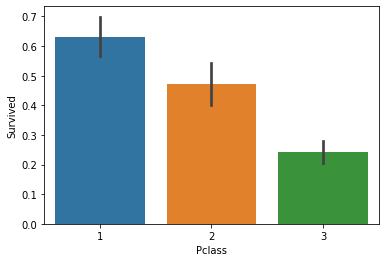

In [9]:
# Alt sınıflarda olanların daha az hayatta kaldığını gözlemleyebiliriz.
sns.barplot(x="Pclass", y="Survived", data=df_original);

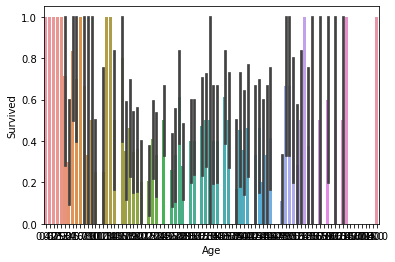

In [10]:
#Buradan ise yaşlı ve çocuklara öncelik verildiğini gözlemleyebiliriz.
sns.barplot(x="Age", y="Survived", data=df_original);

## One Hot Encoding For Categorical Features

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [12]:
#Pclass sütunu için
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df_original['Pclass'])

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded_Pclass = onehot_encoder.fit_transform(integer_encoded)

df_Pclass = pd.DataFrame(data=onehot_encoded_Pclass, columns=["1st","2nd","3rd"])
df_Pclass.head()

,1st,2nd,3rd
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0


In [13]:
#Sex sütunu için
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df_original['Sex'])

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded_Sex = onehot_encoder.fit_transform(integer_encoded)

df_Sex = pd.DataFrame(data=onehot_encoded_Sex, columns=["Female", "Male"])
df_Sex.head()

,Female,Male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0


In [14]:
#Survived sütunu için
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df_original['Survived'])

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded_Survived = onehot_encoder.fit_transform(integer_encoded)

df_Survived = pd.DataFrame(data=onehot_encoded_Survived, columns=["Dead", "Alive"])
df_Survived.head()

,Dead,Alive
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0


## Fill the NaN Cells

--> Age değişkeninde toplam 177 missing value vardır.<br>
--> Cabin değişkeninde toplam 687 missing value vardır.<br>
--> Embarked değişkeninde toplam 2 missing value vardır.<br>

### Cabin Column

Bu sütundaki 891 verinin 687'i missing olduğundan ve olan verilerin de uniqe olmasından dolayı bu sütunu dataframe'den atmaya karar verdim.

In [15]:
df_original.drop(['Cabin'], inplace=True, axis=1)

### Embarked Column

In [16]:
df_original.Embarked.value_counts()
#Yalnızca 2 NaN olduğundan model kullanmadan direkt mod değeri ile doldurmak asıl modelimizi çok etkilemeyecektir.

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
df_original['Embarked'] = df_original['Embarked'].fillna("S")

In [18]:
df_original.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
#Embarked sütunu için
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df_original['Embarked'])

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded_Embarked = onehot_encoder.fit_transform(integer_encoded)

df_Embarked = pd.DataFrame(data=onehot_encoded_Embarked, columns=["C", "Q","S"])
print(df_Embarked)

       C    Q    S
0    0.0  0.0  1.0
1    1.0  0.0  0.0
2    0.0  0.0  1.0
3    0.0  0.0  1.0
4    0.0  0.0  1.0
..   ...  ...  ...
886  0.0  0.0  1.0
887  0.0  0.0  1.0
888  0.0  0.0  1.0
889  1.0  0.0  0.0
890  0.0  1.0  0.0

[891 rows x 3 columns]


### Age Column

Age sütunu için Lineer Regresyon Modelini kullanarak 177 adet NaN değeri dolduracağız.

In [20]:
#KNN için X matrisi oluşturulur
df_AgeLR = df_original.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [21]:
df_AgeLR = df_AgeLR.drop(['Pclass', 'Sex', 'Embarked', 'Survived'], axis=1)
df_AgeLR.head()

,Age,SibSp,Parch,Fare
0,22.0,1,0,0.283021
1,38.0,1,0,2.782715
2,26.0,0,0,0.309371
3,35.0,1,0,2.072886
4,35.0,0,0,0.314251


In [22]:
df_AgeLR = pd.concat([df_AgeLR, df_Embarked, df_Pclass, df_Sex, df_Survived], axis=1, sort=False)

In [23]:
df_AgeLR

,Age,SibSp,Parch,Fare,C,Q,S,1st,2nd,3rd,Female,Male,Dead,Alive
0,22.0,1,0,0.283021,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,38.0,1,0,2.782715,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,26.0,0,0,0.309371,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,35.0,1,0,2.072886,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,35.0,0,0,0.314251,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,0.507486,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
887,19.0,0,0,1.171122,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
888,NaN,1,2,0.915427,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
889,26.0,0,0,1.171122,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [24]:
df_AgeLR_noNaN = df_AgeLR.dropna()
df_AgeLR_noNaN

,Age,SibSp,Parch,Fare,C,Q,S,1st,2nd,3rd,Female,Male,Dead,Alive
0,22.0,1,0,0.283021,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,38.0,1,0,2.782715,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,26.0,0,0,0.309371,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,35.0,1,0,2.072886,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,35.0,0,0,0.314251,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,39.0,0,5,1.136964,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
886,27.0,0,0,0.507486,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
887,19.0,0,0,1.171122,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
889,26.0,0,0,1.171122,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [25]:
df_AgeLR_Y = df_AgeLR_noNaN['Age']

In [26]:
df_AgeLR_X = df_AgeLR_noNaN.drop(['Age'], axis =1,inplace=False)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
LM = LinearRegression()
LM.fit(df_AgeLR_X, df_AgeLR_Y)
LM.coef_

array([-4.07886994, -0.77138148, -0.50455339, -2.23087864,  2.18450526,
        0.04637338,  9.70176357, -1.94129151, -7.76047206,  0.20667299,
       -0.20667299,  3.34670786, -3.34670786])

In [29]:
df_tmp = df_AgeLR.drop(['Age'], axis=1)
for i in range(df_AgeLR.shape[0]):
    if np.isnan(df_AgeLR.iloc[i,0]):
        df_AgeLR.iloc[i,0] = LM.predict(df_tmp.iloc[[i]])


In [30]:
df_AgeLR

,Age,SibSp,Parch,Fare,C,Q,S,1st,2nd,3rd,Female,Male,Dead,Alive
0,22.000000,1,0,0.283021,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,38.000000,1,0,2.782715,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,26.000000,0,0,0.309371,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,35.000000,1,0,2.072886,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,35.000000,0,0,0.314251,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.000000,0,0,0.507486,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
887,19.000000,0,0,1.171122,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
888,24.075249,1,2,0.915427,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
889,26.000000,0,0,1.171122,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [31]:
df_original['Age'] = df_AgeLR['Age']

In [32]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


## Create Our Models

### Model After Filling Missing Values

In [33]:
X = df_AgeLR.drop(['Dead', 'Alive'], axis=1)
X.count()

Age       891
SibSp     891
Parch     891
Fare      891
C         891
Q         891
S         891
1st       891
2nd       891
3rd       891
Female    891
Male      891
dtype: int64

In [34]:
Y = df_original['Survived']
Y.count()

891

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
LM_filled = LogisticRegression(max_iter=1000)

In [37]:
LM_filled.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
LM_filled.coef_

array([[-0.05127336, -0.42692687, -0.08940827,  0.05428259,  0.12305781,
         0.11572613, -0.23944504,  1.18234405,  0.05141776, -1.23442291,
         1.32503095, -1.32569204]])

### Model After Drop NaN Rows

In [39]:
df_noNaN = pd.read_csv("titanic.csv")

In [40]:
df_original['Fare'] = (df_original['Fare'] - df_original['Fare'].mean())/df_original['Fare'].std()
def normalize(dataset):
    dataNorm=((dataset-dataset.min())/(dataset.max()-dataset.min()))*20
    return dataNorm

df_noNaN['Fare'] = normalize(df_noNaN['Fare'])
df_noNaN

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0.283021,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,2.782715,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,0.309371,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,2.072886,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,0.314251,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,0.507486,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,1.171122,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,0.915427,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,1.171122,C148,C


In [41]:
df_noNaN.dropna(inplace=True)

In [42]:
Y = df_noNaN['Survived']
df_noNaN.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_noNaN

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,female,38.0,1,0,2.782715,C
3,1,female,35.0,1,0,2.072886,S
6,1,male,54.0,0,0,2.024577,S
10,3,female,4.0,1,1,0.651925,S
11,1,female,58.0,0,0,1.036443,S
...,...,...,...,...,...,...,...
871,1,female,47.0,1,1,2.051579,S
872,1,male,33.0,0,0,0.195187,S
879,1,female,56.0,0,1,3.246284,C
887,1,female,19.0,0,0,1.171122,S


In [43]:
#Sex sütunu için
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df_noNaN['Sex'])

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded_Sex = onehot_encoder.fit_transform(integer_encoded)

df_Sex = pd.DataFrame(data=onehot_encoded_Sex, columns=["Female", "Male"])
df_Sex.head()

,Female,Male
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0


In [44]:
#Embarked sütunu için
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df_noNaN['Embarked'])

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded_Embarked = onehot_encoder.fit_transform(integer_encoded)

df_Embarked = pd.DataFrame(data=onehot_encoded_Embarked, columns=["C", "Q","S"])
df_Embarked.head()

,C,Q,S
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [45]:
df_noNaN = df_noNaN.drop(['Sex', 'Embarked'], axis=1)
df_noNaN = df_noNaN.reset_index() #concat uygularken indexler sıkıntı çıkartıyor
df_noNaN

,index,Pclass,Age,SibSp,Parch,Fare
0,1,1,38.0,1,0,2.782715
1,3,1,35.0,1,0,2.072886
2,6,1,54.0,0,0,2.024577
3,10,3,4.0,1,1,0.651925
4,11,1,58.0,0,0,1.036443
...,...,...,...,...,...,...
178,871,1,47.0,1,1,2.051579
179,872,1,33.0,0,0,0.195187
180,879,1,56.0,0,1,3.246284
181,887,1,19.0,0,0,1.171122


In [46]:
df_noNaN = pd.concat([df_noNaN, df_Embarked, df_Sex], axis=1, sort=False)
df_noNaN.drop(['index'], axis=1, inplace = True)
df_noNaN

,Pclass,Age,SibSp,Parch,Fare,C,Q,S,Female,Male
0,1,38.0,1,0,2.782715,1.0,0.0,0.0,1.0,0.0
1,1,35.0,1,0,2.072886,0.0,0.0,1.0,1.0,0.0
2,1,54.0,0,0,2.024577,0.0,0.0,1.0,0.0,1.0
3,3,4.0,1,1,0.651925,0.0,0.0,1.0,1.0,0.0
4,1,58.0,0,0,1.036443,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
178,1,47.0,1,1,2.051579,0.0,0.0,1.0,1.0,0.0
179,1,33.0,0,0,0.195187,0.0,0.0,1.0,0.0,1.0
180,1,56.0,0,1,3.246284,1.0,0.0,0.0,1.0,0.0
181,1,19.0,0,0,1.171122,0.0,0.0,1.0,1.0,0.0


In [47]:
LM_dropped = LogisticRegression(max_iter=1000)

In [48]:
LM_dropped.fit(df_noNaN,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
LM_dropped.coef_

array([[-0.488988  , -0.03908762,  0.14204623, -0.36739684,  0.03897623,
         0.33346366, -0.32454577, -0.00889025,  1.29072872, -1.29070107]])

## Prepare Test Set

In [50]:
df_test = pd.read_csv('test.csv')

In [51]:
df_test = df_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [52]:
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].mean())
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [53]:
#Pclass sütunu için
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df_test['Pclass'])

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded_Pclass = onehot_encoder.fit_transform(integer_encoded)

df_Pclass = pd.DataFrame(data=onehot_encoded_Pclass, columns=["1st","2nd","3rd"])
df_Pclass.head()

,1st,2nd,3rd
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [54]:
#Sex sütunu için
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df_test['Sex'])

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded_Sex = onehot_encoder.fit_transform(integer_encoded)

df_Sex = pd.DataFrame(data=onehot_encoded_Sex, columns=["Female", "Male"])
df_Sex.head()

,Female,Male
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0


In [55]:
#Embarked sütunu için
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df_test['Embarked'])

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded_Embarked = onehot_encoder.fit_transform(integer_encoded)

df_Embarked = pd.DataFrame(data=onehot_encoded_Embarked, columns=["C", "Q","S"])
df_Embarked.head()

,C,Q,S
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [56]:
df_test = pd.concat([df_test, df_Embarked, df_Pclass, df_Sex], axis=1, sort=False)

In [57]:
df_test.drop(['Embarked', 'Pclass', 'Sex'], axis=1, inplace=True)

In [58]:
df_test_train = df_test.dropna()

In [59]:
df_test_train_X = df_test_train.drop(['Age'], axis=1)

In [60]:
LM = LinearRegression()
LM.fit(df_test_train_X, df_test_train['Age'])
LM.coef_

array([-1.476962  , -0.60511252,  0.02047338, -2.46452383,  3.21100555,
       -0.74648172,  9.52364949, -2.447822  , -7.07582749, -1.0670555 ,
        1.0670555 ])

In [61]:
df_tmp = df_test.drop(['Age'], axis=1)
for i in range(df_test.shape[0]):
    if np.isnan(df_test.iloc[i,0]):
        df_test.iloc[i,0] = LM.predict(df_tmp.iloc[[i]])


In [62]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     418 non-null    float64
 1   SibSp   418 non-null    int64  
 2   Parch   418 non-null    int64  
 3   Fare    418 non-null    float64
 4   C       418 non-null    float64
 5   Q       418 non-null    float64
 6   S       418 non-null    float64
 7   1st     418 non-null    float64
 8   2nd     418 non-null    float64
 9   3rd     418 non-null    float64
 10  Female  418 non-null    float64
 11  Male    418 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 39.3 KB


In [63]:
filled_preds = LM_filled.predict(df_test)

In [64]:
print(filled_preds)

[0 0 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1
 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0
 1 0 1 0 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 0 1 0
 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0
 1 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 0 1 1 1 0
 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1
 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0
 1 1 1 1 1 1 0 1 0 0 0]


In [65]:
df_cevap = pd.read_csv("cevap.csv")

In [66]:
df_cevap['Survived'] = filled_preds

In [67]:
df_cevap.to_csv("cevap.csv")

In [68]:
################################################################################3

In [69]:
df_test_noNaN = pd.read_csv('test.csv')
df_test_noNaN

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [70]:
df_test_noNaN = df_test_noNaN.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Sex', 'Embarked'], axis=1)
df_test_noNaN['Age'] = df_test['Age']

In [71]:
df_test_noNaN['Fare'] = df_test_noNaN['Fare'].fillna(df_test_noNaN['Fare'].mean())

In [72]:
df_test_noNaN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Age     418 non-null    float64
 2   SibSp   418 non-null    int64  
 3   Parch   418 non-null    int64  
 4   Fare    418 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 16.5 KB


In [73]:
df_test_noNaN = pd.concat([df_test_noNaN, df_Embarked, df_Sex], axis=1, sort=False)

In [74]:
df_test_noNaN

,Pclass,Age,SibSp,Parch,Fare,C,Q,S,Female,Male
0,3,34.500000,0,0,7.8292,0.0,1.0,0.0,0.0,1.0
1,3,47.000000,1,0,7.0000,0.0,0.0,1.0,1.0,0.0
2,2,62.000000,0,0,9.6875,0.0,1.0,0.0,0.0,1.0
3,3,27.000000,0,0,8.6625,0.0,0.0,1.0,0.0,1.0
4,3,22.000000,1,1,12.2875,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
413,3,25.402974,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
414,1,39.000000,0,0,108.9000,1.0,0.0,0.0,1.0,0.0
415,3,38.500000,0,0,7.2500,0.0,0.0,1.0,0.0,1.0
416,3,25.402974,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [75]:
noNaNPreds = LM_dropped.predict(df_test_noNaN)

In [76]:
df_cevap_drop = pd.read_csv("cevap.csv")

In [77]:
df_cevap_drop['Survived'] = noNaNPreds

In [78]:
df_cevap_drop.to_csv("cevap_drop.csv")